In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from sklearn.model_selection import KFold,cross_val_score,train_test_split,GridSearchCV,RandomizedSearchCV

In [2]:
company = pd.read_csv("E:/ExcelR/Assignments/Data Science Assignments/15.Random Forests/Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


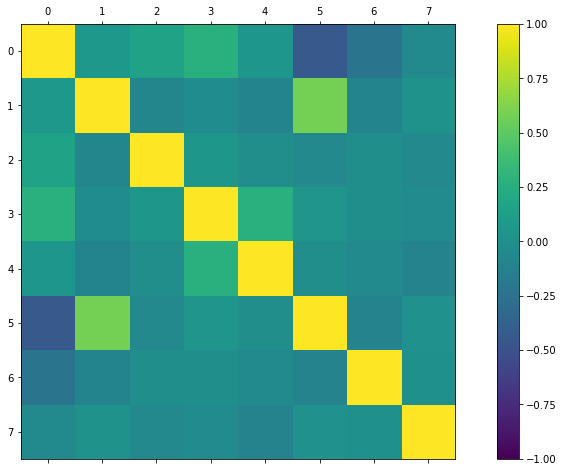

In [5]:
# correlation matrix
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(company.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

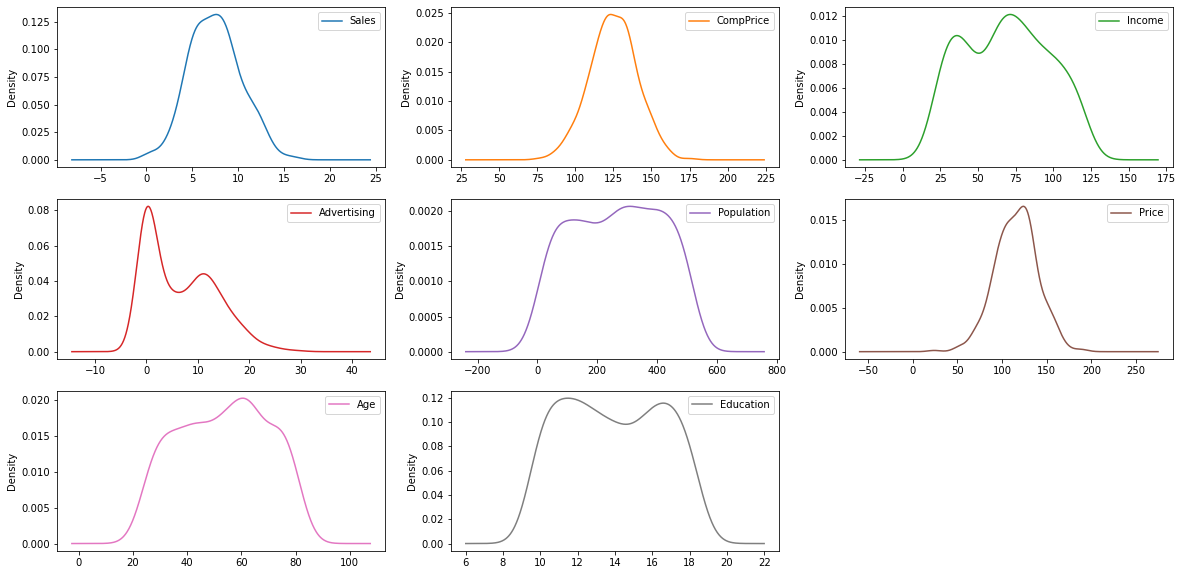

In [6]:
#density plot for frequency distribution
company.plot(kind="kde", subplots=True, layout=(3,3),sharex=False,figsize=(20,10))
plt.show()

In [7]:
#converting Sales into Categorical Variable by Calculating its Median
print("Median -",company['Sales'].median())

Median - 7.49


In [8]:
#Creating a new Column for categorical sales value
company["sales"]= "<=7.49" 
company.loc[company["Sales"]>=7.49,"sales"]=">=7.49"
company.drop(["Sales"],axis=1,inplace = True)
print(company.shape)
company.head()

(400, 11)


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,>=7.49
1,111,48,16,260,83,Good,65,10,Yes,Yes,>=7.49
2,113,35,10,269,80,Medium,59,12,Yes,Yes,>=7.49
3,117,100,4,466,97,Medium,55,14,Yes,Yes,<=7.49
4,141,64,3,340,128,Bad,38,13,Yes,No,<=7.49


In [9]:
# applying lable encoder to sales column and One Hot Encoding for other
label_encoder = preprocessing.LabelEncoder()
company["sales"]= label_encoder.fit_transform(company["sales"]) 
company = pd.get_dummies(company)
print(company.shape)
company.head()

(400, 15)


,CompPrice,Income,Advertising,Population,Price,Age,Education,sales,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,1,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,1,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,0,1,0,0,0,1,1,0


In [10]:
# seprating x and y(class) variables 
X= pd.concat([company.iloc[:,0:7],company.iloc[:,8:]],axis = 1)
Y= company.iloc[:,7]

In [11]:
# >=7.49 : 1 & <=7.49 : 0
Y.value_counts()

1    201
0    199
Name: sales, dtype: int64

In [12]:
# Splitting data into training and testing data set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30,random_state=0)

In [13]:
#applying RF classifier with criteria and depth on train models
model = RandomForestClassifier(random_state=0)
model.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

In [14]:
#Randomized search for hyper parameter
param_dict={"n_estimators":[50,70,90,100,200],"criterion":["entropy","gini"],"max_depth":range(1,10),
            "max_features":["auto","sqrt","log2"]}
grid = RandomizedSearchCV(model,param_dict,cv=10)
grid.fit(X_train,Y_train)
grid.best_params_,grid.best_score_

({'n_estimators': 100,
  'max_features': 'sqrt',
  'max_depth': 5,
  'criterion': 'gini'},
 0.775)

In [15]:
#grid search for hyper parameter
param_dict={"n_estimators":[90,100,200],"criterion":["entropy","gini"],"max_depth":range(1,10),
            "max_features":["auto","sqrt","log2"]}
grid = GridSearchCV(model,param_grid=param_dict,cv=10)
grid.fit(X_train,Y_train)
grid.best_params_,grid.best_score_

({'criterion': 'gini',
  'max_depth': 7,
  'max_features': 'auto',
  'n_estimators': 90},
 0.7892857142857144)

**As grid search gives more accuracy we apply same parameters from GridSearchCV Results**

In [16]:
# applying RF classifier parameters on train models based on GridSearchCV Results
model = RandomForestClassifier(n_estimators = 90 ,criterion = "gini" ,max_depth = 7 ,max_features = "log2" )
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=90)

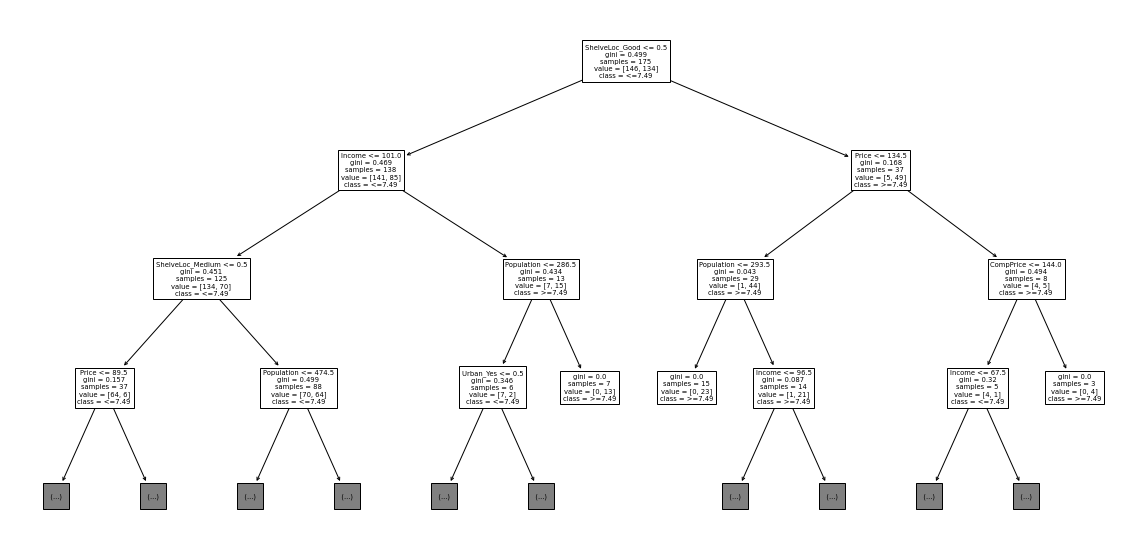

In [17]:
# first 3 roots of Tree
rf_best = grid.best_estimator_
plt.figure(figsize=(20,10))
plot_tree(rf_best.estimators_[7],max_depth=3, feature_names = X.columns,class_names=["<=7.49", ">=7.49"]);

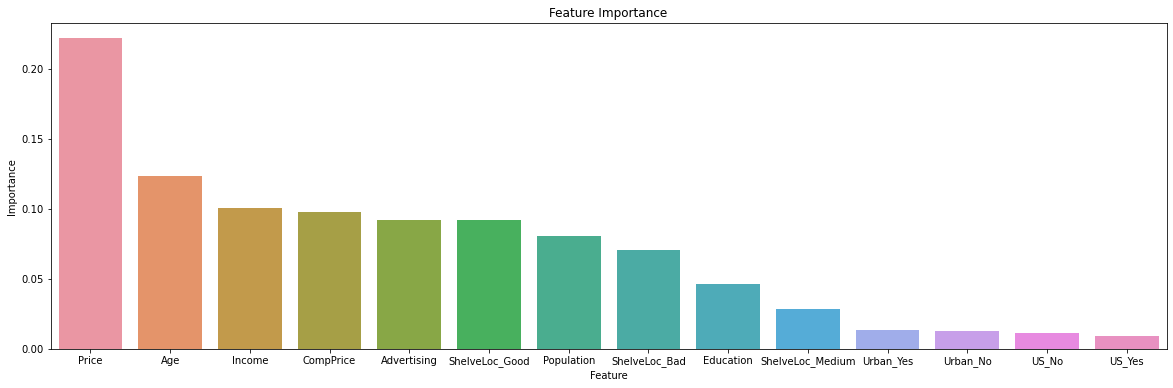

In [18]:
#listing and plotting features with their importance
imp_feat = pd.DataFrame({"Feature": X_train.columns,"Importance": rf_best.feature_importances_})
imp_feat = imp_feat.sort_values(by = "Importance", ascending = False)
plt.figure(figsize=(20,6))
plt.title("Feature Importance")
sns.barplot(y = "Importance", x = "Feature", data=imp_feat)
plt.show();

**It can be seen Price, Age, Advertising have a greater impact in predicting Sales**

In [19]:
#Predicting on test data
preds = model.predict(X_test)
pd.Series(preds).value_counts()

0    63
1    57
dtype: int64

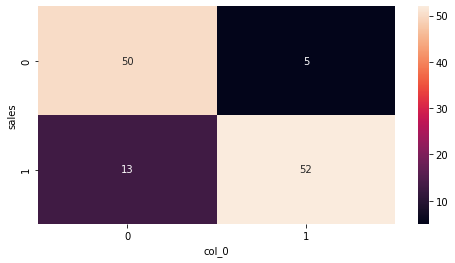

In [20]:
#Confusion Matrix
plt.figure(figsize=(8,4))
matrix = pd.crosstab(Y_test,preds)
sns.heatmap(matrix,annot=True);

In [21]:
#Accuracy using different methods
results = cross_val_score(model, X, Y, cv=10)
matrix = f1_score(Y_test, preds)
print("Mean cross_val_score -",round(results.mean()*100,2),"%",
      "\nF1 Score -",round(matrix*100,2),"%",
      "\nY_test Accuracy -",round(np.mean(preds==Y_test)*100,2),"%")

Mean cross_val_score - 79.75 % 
F1 Score - 85.25 % 
Y_test Accuracy - 85.0 %


**An Average Accuracy above 80% is achived which makes the model good and useful for future predictions**